In [58]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class

text_size=26
fig_size_x=24
fig_size_y=14

z_plot = 10

params_lcdm = {
    'output':'lCl,tCl,mPk,mTk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'write background':'y',
    'z_pk' : '100.0,50.,20.0,10.,1.,0.', 
    'input_verbose':10,
    'background_verbose':10,
    'Omega_b' : 0.0486,
    'Omega_cdm':0.2589,
    #'omega_b':0.02222,
    #'omega_cdm':0.1197,
    'H0':67.74,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

l_max_scalars = 2500
params_fe = {
    'output':'lCl,tCl,mPk,mTk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'z_pk' : '100.0,50.,20.0,10.,1.,0.', 
    'gravity_model':'quintessence_extended',
    'parameters_smg':'-0.5,1.,0.1,1.7,1e-20',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    'Omega_b' : 0.0486,
    'Omega_cdm':0.2589,
    #'omega_b':0.02222,
    #'omega_cdm':0.1197,
    'H0':67.74,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

params_fe2 = {
    'output':'lCl,tCl,mPk,mTk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':'-0.5,1.,-0.1,1e-10,1e-21',
    'z_pk' : '100.0,50.,20.0,10.,1.,0.', 
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    'Omega_b' : 0.0486,
    'Omega_cdm':0.2589,
    #'omega_b':0.02222,
    #'omega_cdm':0.1197,
    'H0':67.74,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

params_fe3 = {
    'output':'lCl,tCl,mPk,mTk',
    'P_k_max_h/Mpc':1,
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_monomial',
    'parameters_smg':'-0.5,1.,1.,1.',
    'z_pk' : '100.0,50.,20.0,10.,1.,0.', 
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    'Omega_b' : 0.0486,
    'Omega_cdm':0.2589,
    #'omega_b':0.02222,
    #'omega_cdm':0.1197,
    'H0':67.74,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
}

k = 1e-4*np.array(range(1,6001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe3)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

PK3=np.zeros(6000)
for i in range (0,5999):
    PK3[i]=cosmo.pk(k[i],z_plot)

cosmo.struct_cleanup()
cosmo.empty()









cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
print("LCDM: " + str(cosmo.age()))

PK_lcdm=np.zeros(6000)
for i in range (0,5999):
    PK_lcdm[i]=cosmo.pk(k[i],z_plot)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo.lensed_cl(2500)

cosmo.struct_cleanup()
cosmo.empty()



cosmo = Class()
cosmo.set(params_fe)
cosmo.compute()

bkg_fe=cosmo.get_background()
#print(bkg_fe.viewkeys())
print(cosmo.age())

prtt_fe=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)
raw_cl = cosmo.raw_cl(l_max_scalars)
#raw_cl.viewkeys()

lensed_cl = cosmo.lensed_cl(2500)
#lensed_cl.viewkeys()

k = 1e-4*np.array(range(1,6001))
PK=np.zeros(6000)
for i in range (0,5999):
    PK[i]=cosmo.pk(k[i],z_plot)

cosmo.struct_cleanup()
cosmo.empty()






cosmo.set(params_fe2)
cosmo.compute()

bkg_fe2=cosmo.get_background()
#print(bkg_fe2.viewkeys())
print(cosmo.age())

prtt_fe2=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl2 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl2 = cosmo.lensed_cl(2500)
#lensed_cl2.viewkeys()

PK2=np.zeros(6000)
for i in range (0,5999):
    PK2[i] = cosmo.pk(k[i],z_plot)

k_q = np.zeros(np.shape(cosmo.get_transfer(z_plot)['k (h/Mpc)'])[0]);
pi = np.zeros(np.shape(cosmo.get_transfer(z_plot)['k (h/Mpc)'])[0]);
v_pi = np.zeros(np.shape(cosmo.get_transfer(z_plot)['k (h/Mpc)'])[0]);

# for i in range (np.shape(cosmo.get_transfer(z_plot)['k (h/Mpc)'])[0]):
#     k_q [i] = cosmo.get_transfer(z_plot)['k (h/Mpc)'][i]
#     pi [i] = cosmo.get_transfer(z_plot)['vx_smg'][i]
#     v_pi [i] = cosmo.get_transfer(z_plot)['vx_prime_smg'][i]

# cosmo.struct_cleanup()
# cosmo.empty()

13.76856967678693
LCDM: 13.814629154612481
13.351563044221185
13.46382129845692


(0.01, 1)

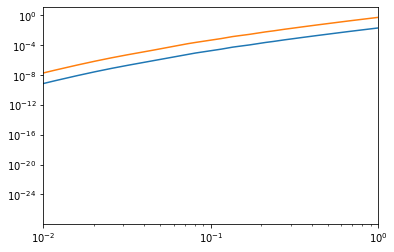

In [63]:
z_plot = 10
k_q = cosmo.get_transfer(z_plot)['k (h/Mpc)'];
pi = cosmo.get_transfer(z_plot)['vx_smg']
plt.plot(k_q,pi**2 * 1.e-9 *k_q**2* (k_q/0.05)**(0.95-1))
# plt.plot(k_q,pi**2 * 1.e-9 *k_q**2* (k_q/0.05)**(0.95-1))


z_plot = 1
k_q = cosmo.get_transfer(z_plot)['k (h/Mpc)'];
pi = cosmo.get_transfer(z_plot)['vx_smg']
plt.plot(k_q,pi**2 * 1.e-9 *k_q**2* (k_q/0.05)**(0.95-1))

plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-2,1)

(0.01, 1)

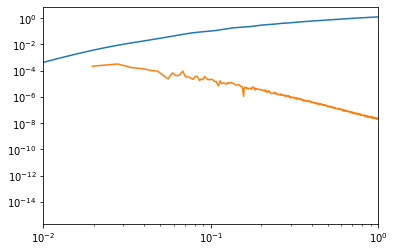

In [94]:
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
w=-0.9;
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a


z_gev=[100, 50, 30, 10, 3, 1, 0 ];
gev_result = []
for i in range(np.shape(z_gev)[0]):
    gev_result.append(np.loadtxt("./../../EQevolution/output/lcdm_pk00"+str(i)+"_pi.dat"))

i=4
Normlization=As*(k_q/kp)**(ns-1.);
plt.plot(k_q,pi**2 * Normlization);
m=-4
a =1/(1+10);
plt.plot(gev_result[i][:,0],gev_result[i][:,1] /Hubble_conf_Mpc(a)/Hubble_conf_Mpc(a))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-2,1)
# plt.ylim(1.e-5,1)

(0.01, 1)

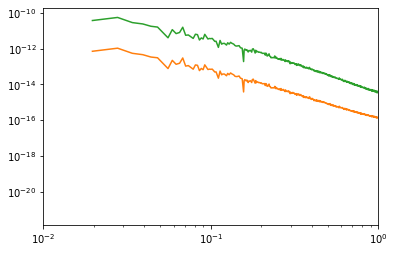

In [57]:
i=0
plt.plot(gev_result[i][:,0],gev_result[i][:,1])
i=1
plt.plot(gev_result[i][:,0],gev_result[i][:,1])
i=4
plt.plot(gev_result[i][:,0],gev_result[i][:,1])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.e-2,1)

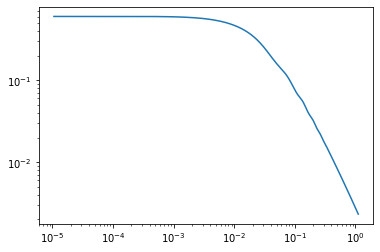

In [44]:
plt.loglog(k_q,v_pi)

In [22]:
# cosmo.get_transfer(0.1, 1)['k (h/Mpc)'] - cosmo.get_transfer(1)['k (h/Mpc)']
cosmo.get_transfer(10)['vx_smg'] - cosmo.get_transfer(1)['vx_smg']

# pi = cosmo.get_transfer(0.1,1)['vx_smg']

CosmoSevereError: 

Error in Class: spectra_output_tk_data(L:4093) :error in spectra_tk_at_z(pba, psp, z, tkfull);
=>spectra_tk_at_z(L:1393) :error in array_interpolate_spline(psp->ln_tau, psp->ln_tau_size, psp->matter_transfer, psp->ddmatter_transfer, psp->ic_size[index_md]*psp->tr_size*psp->ln_k_size, ln_tau, &last_index, output, psp->ic_size[index_md]*psp->tr_size*psp->ln_k_size, psp->error_message);
=>array_interpolate_spline(L:1785) : x=6.783208e+00 < x_min=7.155498e+00

In [17]:
plt.plot(k,cosmo.tk(k[i],z_plot))

AttributeError: 'classy.Class' object has no attribute 'tk'

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


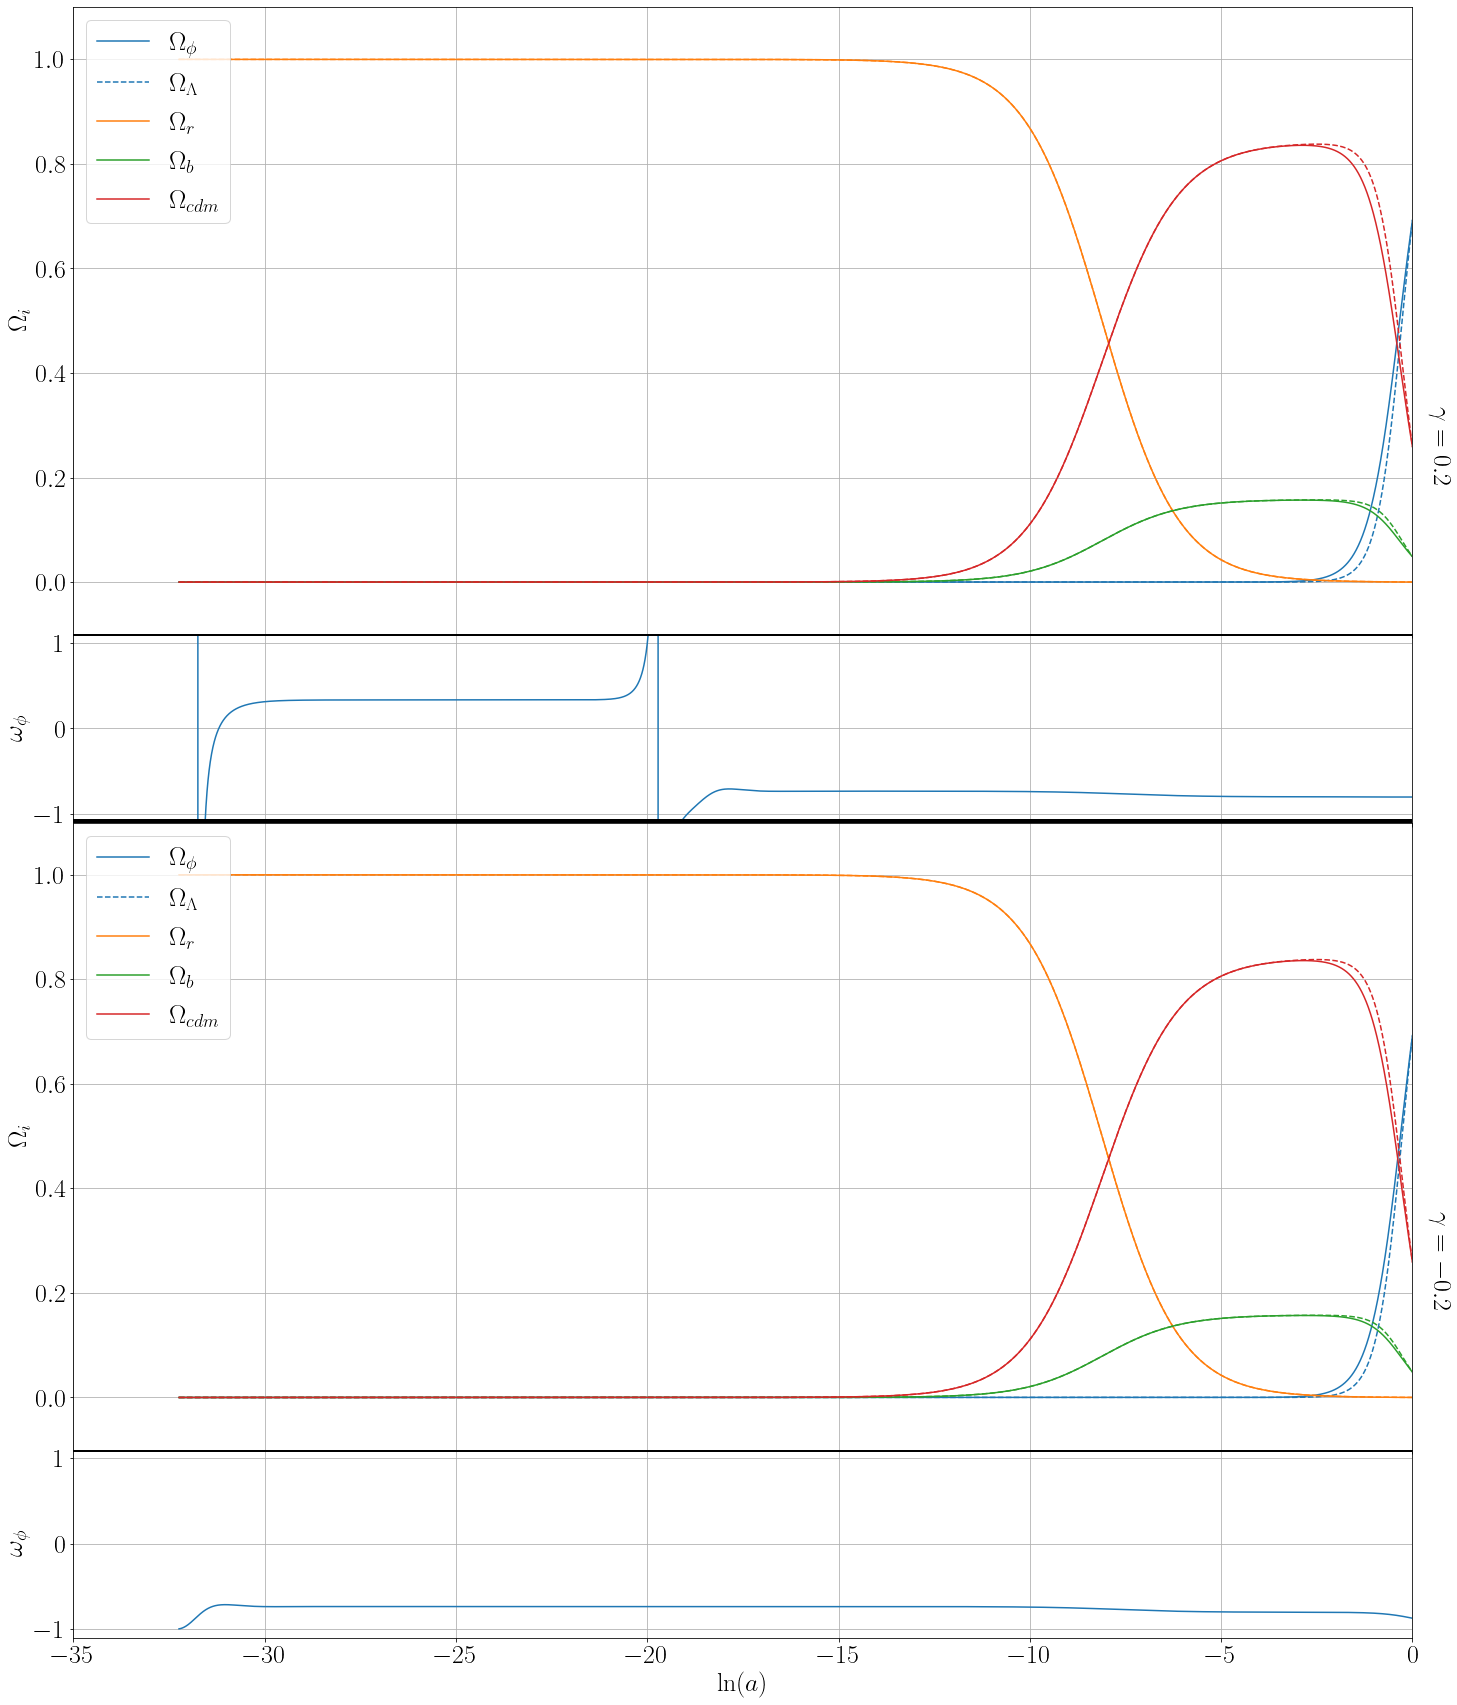

In [2]:
N_last = - 35

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

borders=[-15,0,-0.1,1.1]

f, (ax1, ax1_w, ax2, ax2_w) = plt.subplots(4, sharex=True, sharey=False ,figsize=(24,30),gridspec_kw = {'height_ratios':[1,0.3,1,0.3]})
p1=ax1.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)rho_smg']/bkg_fe['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_g']+bkg_fe['(.)rho_ur'])/bkg_fe['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_b'])/bkg_fe['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax1.plot(np.log(1/(1+bkg_fe['z'])),(bkg_fe['(.)rho_cdm'])/bkg_fe['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax1.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)

ax1.set_ylabel("$\Omega_i$")
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.axis([N_last,0,-0.1,1.1])
ax1.set_xlim(-15,0)

p1_w=ax1_w.plot(np.log(1/(1+bkg_fe['z'])),bkg_fe['(.)p_smg']/bkg_fe['(.)rho_smg'])
ax1_w.set_ylabel("$\omega_\phi$")
ax1_w.grid(True)
ax1_w.axhline(1.1, color="black", linewidth=4)
ax1_w.axhline(-1.1, color="black", linewidth=8)
ax1_w.axis([N_last,0,-1.1,1.1])

left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
ax1.text(1.02, 0.3*(bottom+top), '$\\gamma=0.2$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax1.transAxes)

p1=ax2.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)rho_smg']/bkg_fe2['(.)rho_crit'],label='$\Omega_{\phi}$')
color=p1[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_lambda'])/bkg_lcdm['(.)rho_crit'],linestyle='--',label='$\Omega_\Lambda$',color=color)
p2=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_g']+bkg_fe2['(.)rho_ur'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{r}$')
color=p2[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_g']+bkg_lcdm['(.)rho_ur'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p3=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_b'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{b}$')
color=p3[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_b'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
p4=ax2.plot(np.log(1/(1+bkg_fe2['z'])),(bkg_fe2['(.)rho_cdm'])/bkg_fe2['(.)rho_crit'],label='$\Omega_{cdm}$')
color=p4[0].get_color()
ax2.plot(np.log(1/(1+bkg_lcdm['z'])),(bkg_lcdm['(.)rho_cdm'])/bkg_lcdm['(.)rho_crit'],linestyle='dashed',color=color)
#ax2.set_xlabel("log($a$)")
ax2.set_ylabel("$\Omega_i$")
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.axis([N_last,0,-0.1,1.1])

ax2.text(1.02, 0.3*(bottom+top), '$\\gamma=-0.2$', horizontalalignment='center', verticalalignment='center', rotation=270, transform=ax2.transAxes)

p2_w=ax2_w.plot(np.log(1/(1+bkg_fe2['z'])),bkg_fe2['(.)p_smg']/bkg_fe2['(.)rho_smg'])
ax2_w.set_ylabel("$\omega_\phi$")
ax2_w.set_xlabel("ln($a$)")
ax2_w.axhline(1.1, color="black", linewidth=4)
ax2_w.grid(True)
ax2_w.axis([N_last,0,-1.1,1.1])

f.subplots_adjust(hspace=0)
f.figsize=(24,24)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.eps',bbox_inches='tight',format='eps',dpi=1000)
#plt.savefig('/Users/Alessandro/Documents/Google Drive/Uni/Laurea Magistrale/Prova finale/Tesi/Img/jupyter/quint_density.pdf',bbox_inches='tight')

In [5]:
prtt_fe3.keys()

dict_keys([])

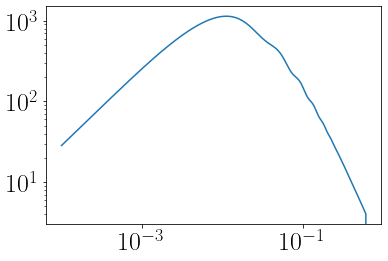

In [3]:
plt.loglog(k,PK2)